MOBILE PHONE DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Phone dataset.csv")

Data modeling

In [3]:
df.head(5)

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,battery,year,price_range,battery_size,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256,8,20-09-2024,3582,01-01-2024,medium price,Medium,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512,8,20-09-2024,3582,01-01-2024,high price,Medium,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000,8,20-09-2024,3582,01-01-2024,high price,Medium,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512,8,20-09-2024,4685,01-01-2024,high price,Large,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128,4,13-11-2020,2227,01-01-2020,medium price,Small,Face,4K


In [4]:
df.describe()

,price_usd,storage,ram,battery
count,1708.000000,1708.000000,1708.000000,1708.000000
mean,419.983156,271.798595,7.981265,4657.326698
std,361.680703,207.513099,3.425618,694.689807
min,52.630000,32.000000,2.000000,1821.000000
25%,167.562500,128.000000,6.000000,4500.000000
50%,278.835000,256.000000,8.000000,5000.000000
75%,550.327500,256.000000,12.000000,5000.000000
max,2353.820000,1000.000000,24.000000,10200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   phone_brand       1708 non-null   object 
 1   phone_model       1708 non-null   object 
 2   store             1708 non-null   object 
 3   price_usd         1708 non-null   float64
 4   storage           1708 non-null   int64  
 5   ram               1708 non-null   int64  
 6   launch_date       1708 non-null   object 
 7   battery           1708 non-null   int64  
 8   year              1708 non-null   object 
 9   price_range       1708 non-null   object 
 10  battery_size      1708 non-null   object 
 11  fingerprint       1708 non-null   object 
 12  video_resolution  1708 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 173.6+ KB


In [6]:
df.isnull().sum()

phone_brand         0
phone_model         0
store               0
price_usd           0
storage             0
ram                 0
launch_date         0
battery             0
year                0
price_range         0
battery_size        0
fingerprint         0
video_resolution    0
dtype: int64

There is no null values in this dataset

In [7]:
df["launch_date"]=pd.to_datetime(df["launch_date"],format="%d-%m-%Y",dayfirst=True)

In [8]:
df["Launch_month_name"]=df["launch_date"].dt.strftime("%b")

In [9]:
df["launch_year"]=df["launch_date"].dt.year

#Change the date column  into actual date format

## Visualization process

Count pLot

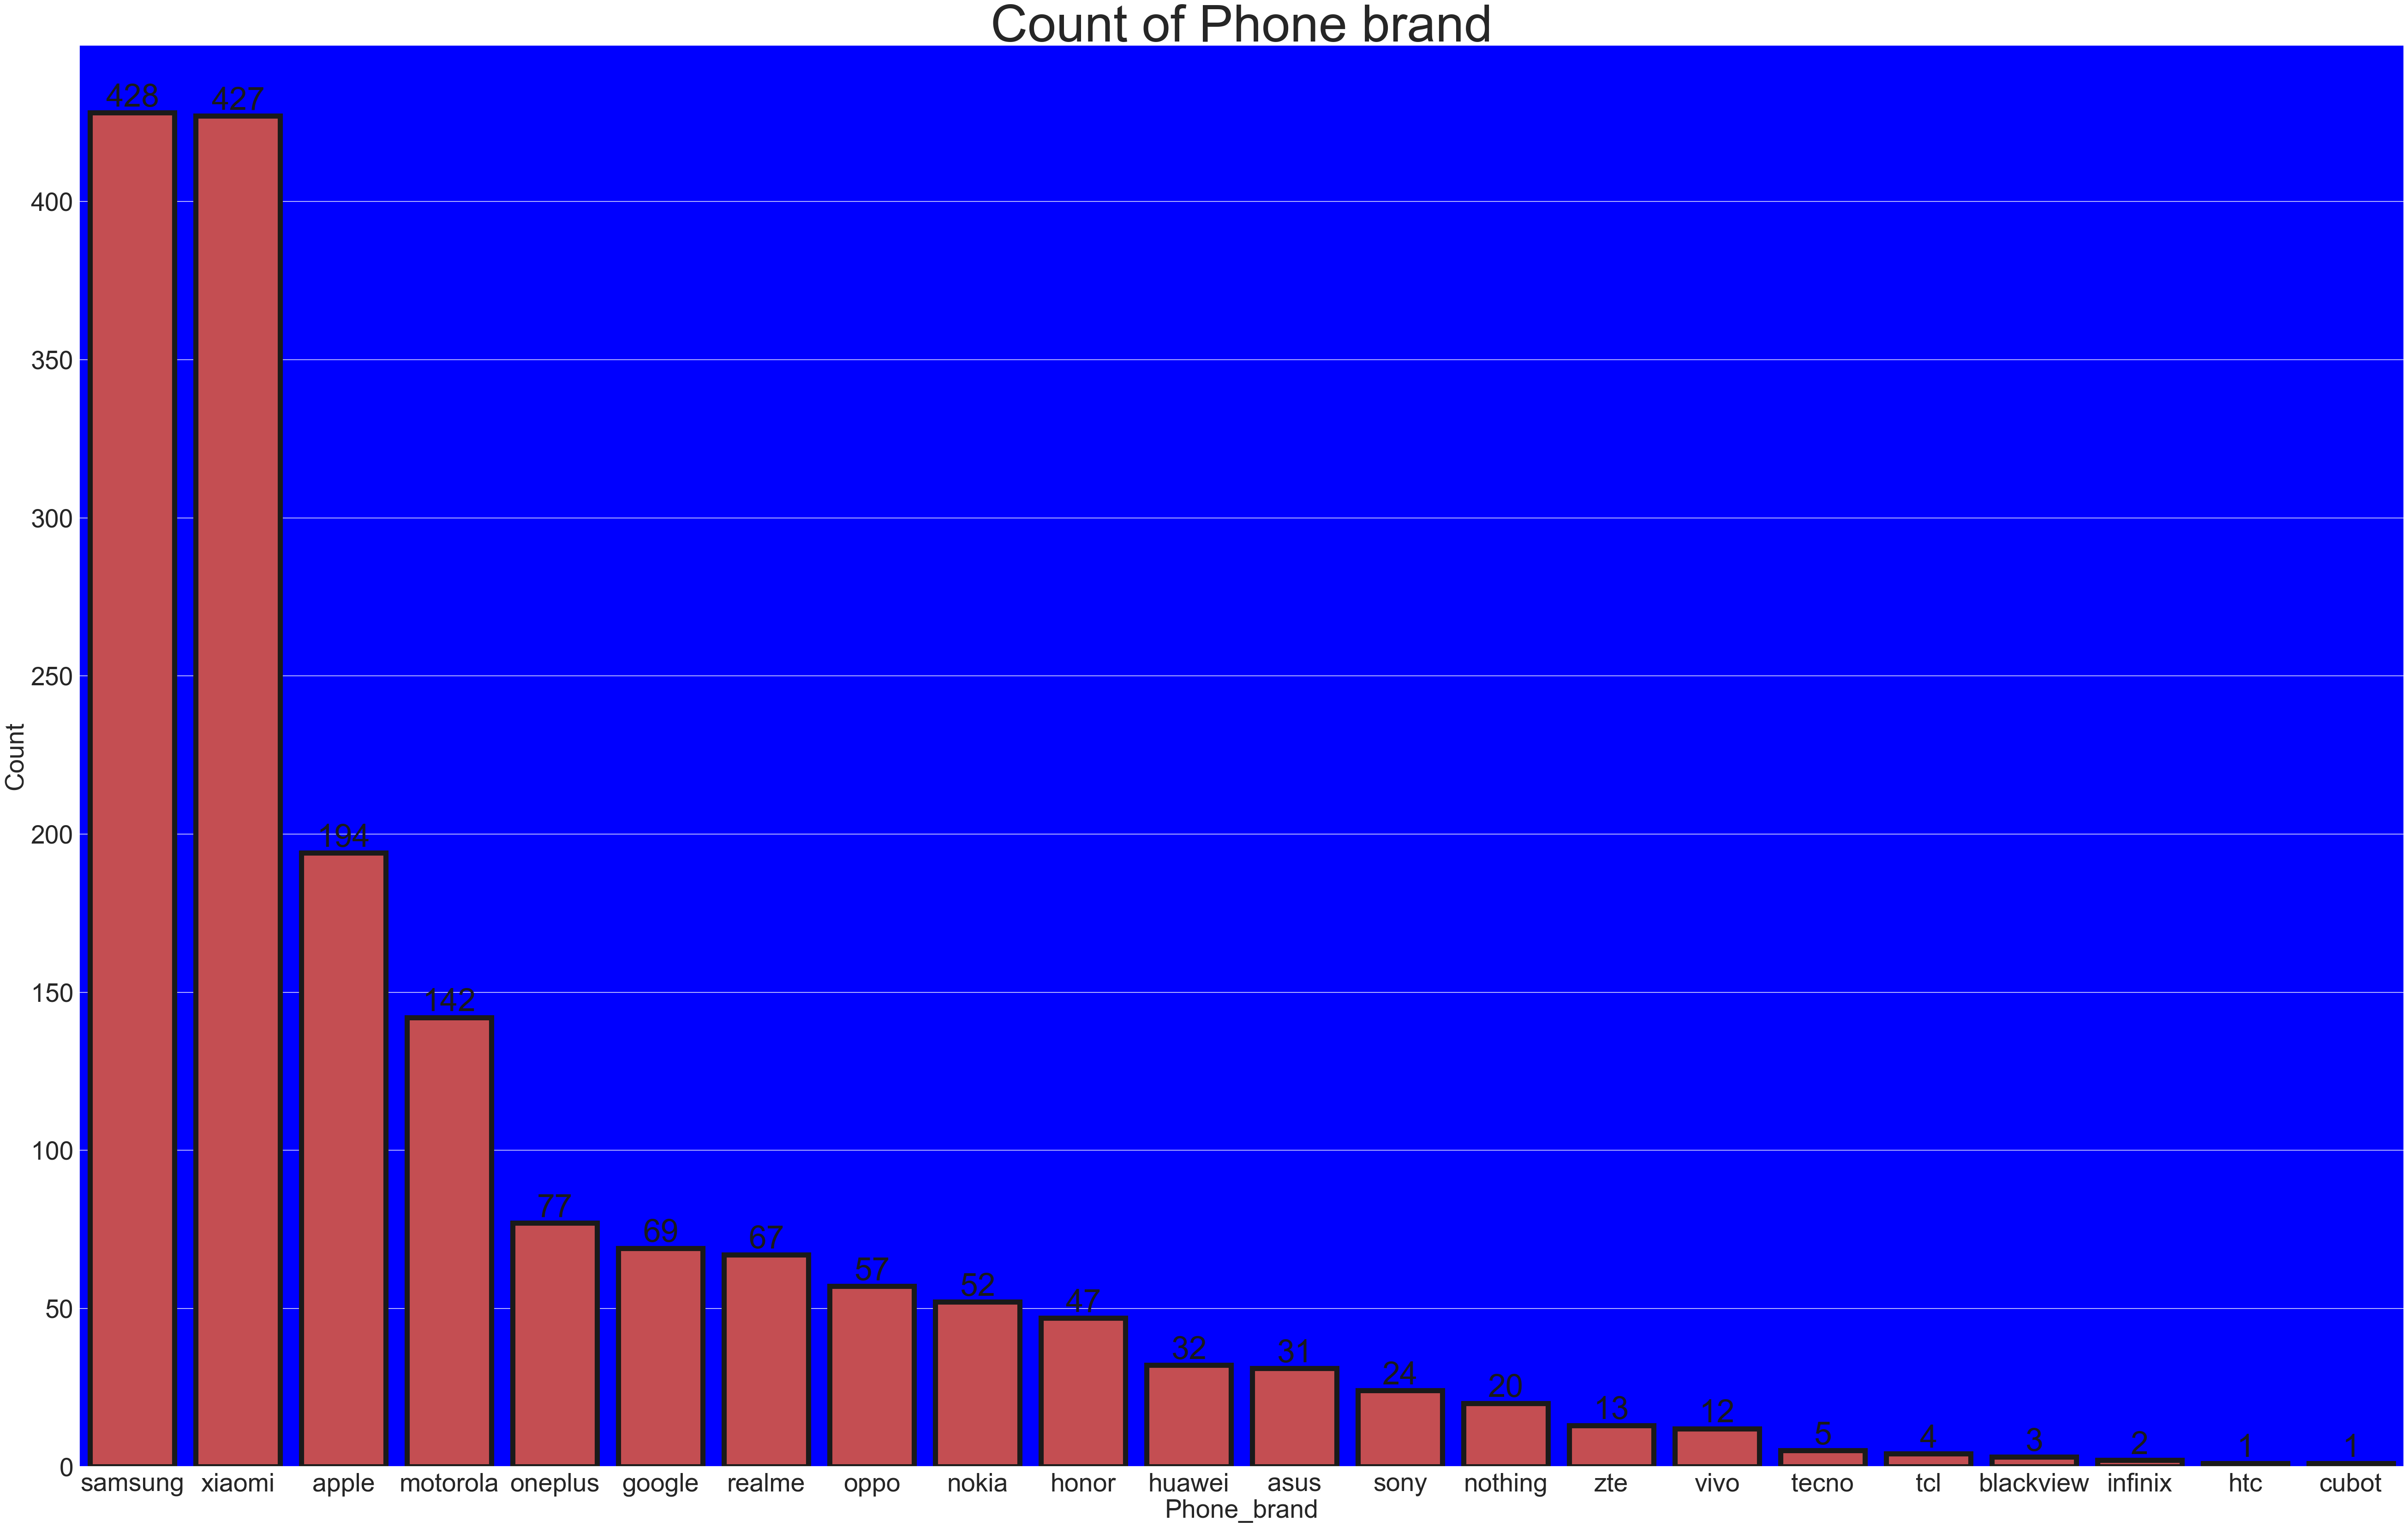

In [21]:
plt.figure(figsize=(65,40))
sns.set(style="darkgrid")
ax=sns.countplot(data=df,x="phone_brand",color="r",edgecolor="k",saturation=1,linewidth=8,order=df["phone_brand"].value_counts().index)
ax.bar_label(ax.containers[0],size=50,color="k")
ax.set_facecolor("blue")
plt.title("Count of Phone brand",size=80)
plt.xlabel("Phone_brand",size=40)
plt.ylabel("Count",size=40)
plt.tick_params(axis="both",labelsize=40)
plt.show()

In [11]:
Top_5_models=df.groupby("phone_model").agg({"battery": "mean"}).reset_index().sort_values("battery",ascending=False).nlargest(5,"battery")

In [12]:
Top_5_models

,phone_model,battery
40,Cubot KingKong X,10200.0
324,Samsung Galaxy Tab S9 FE+,10090.0
323,Samsung Galaxy Tab S9 FE,8000.0
457,ZTE nubia Red Magic 9S Pro,6500.0
456,ZTE nubia Red Magic 9 Pro,6500.0


Bar plot

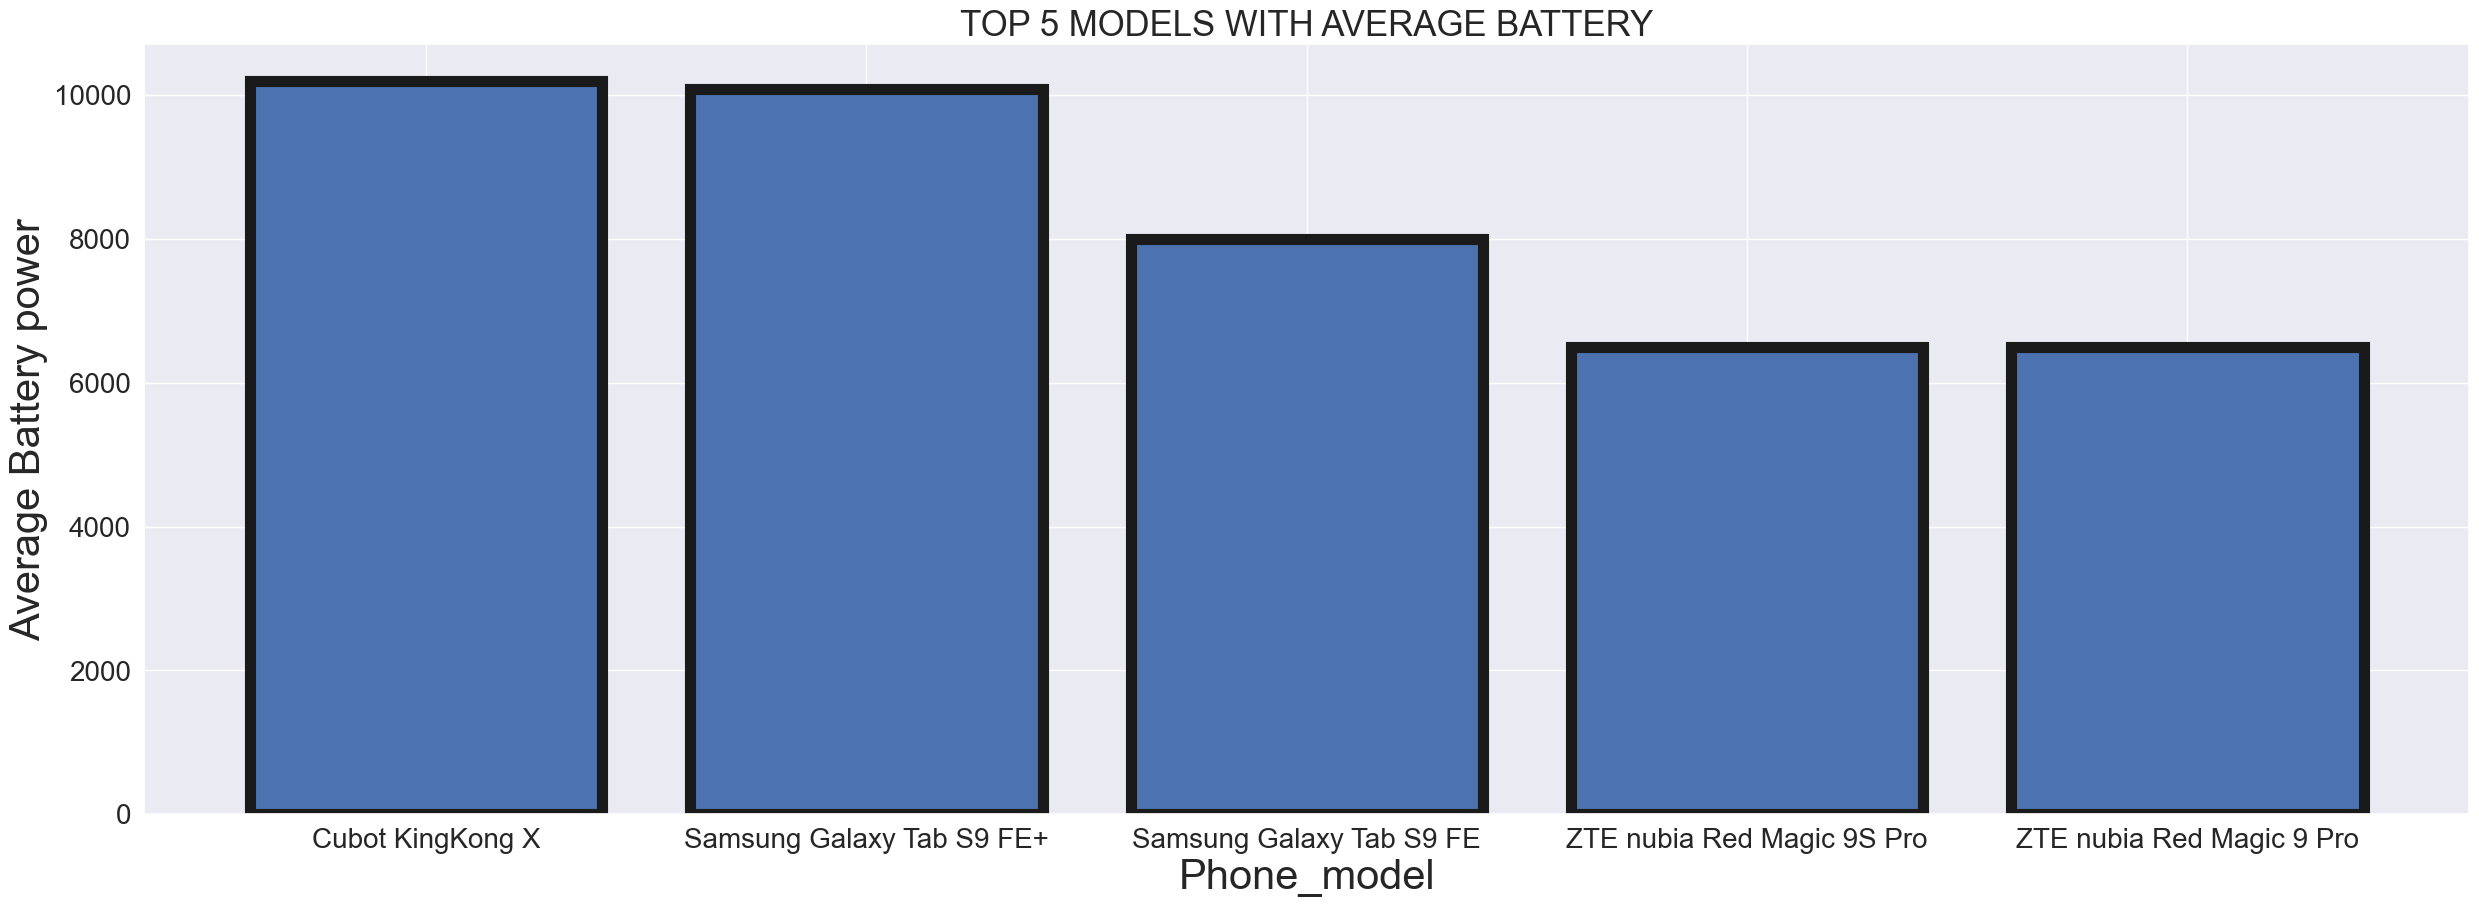

In [13]:
plt.figure(figsize=(30, 10))
plt.bar(x=Top_5_models["phone_model"],height=Top_5_models["battery"],edgecolor="k",linewidth=8)
plt.title("TOP 5 MODELS WITH AVERAGE BATTERY" ,size=25)
plt.xlabel("Phone_model",size=30)
plt.ylabel("Average Battery power",size=30)
plt.tick_params(axis="both",labelsize=20)
plt.show()

Scatter plot

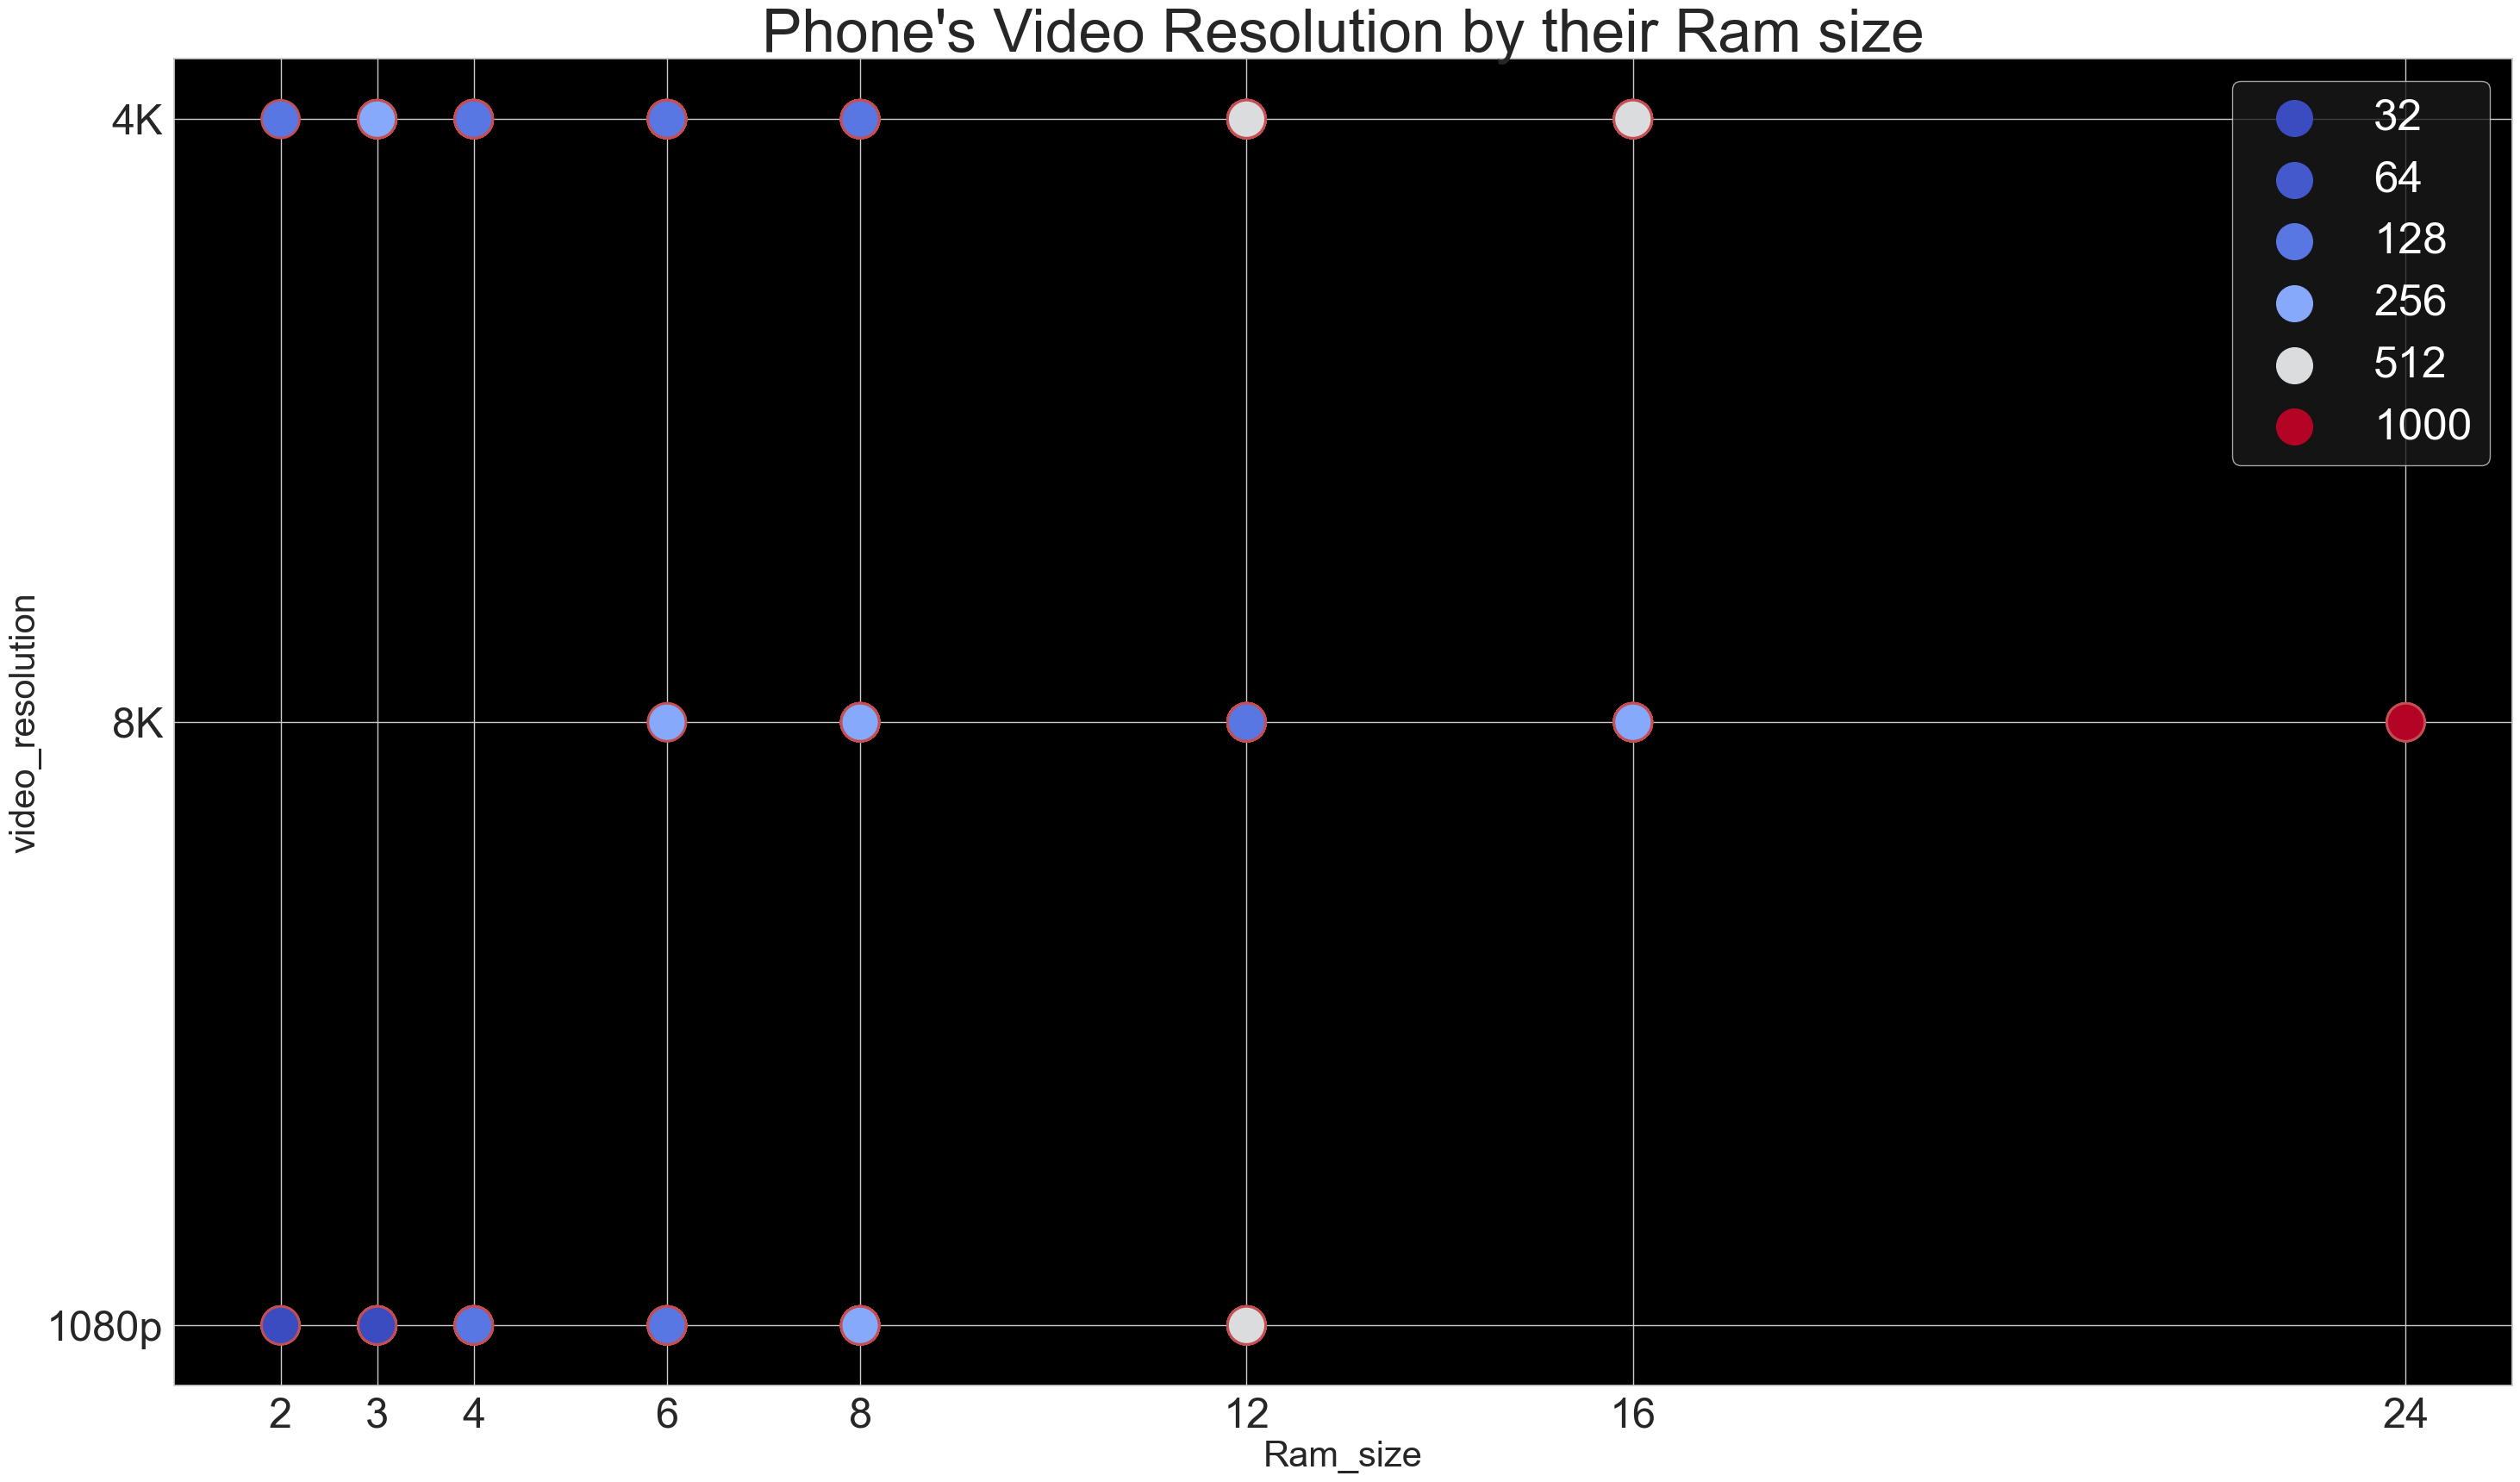

In [14]:
plt.figure(figsize=(35,20))
sns.set(style="whitegrid")
ax=sns.scatterplot(data=df, x="ram",y="video_resolution",hue="storage",palette="coolwarm",s=1000,
                edgecolor="r",linewidth=2)
ax.set_facecolor("black")
plt.xticks([2,3,4,6,8,12,16,24],size=35)
plt.yticks(size=35)
plt.legend(fontsize=37,facecolor="k",labelcolor="w",markerscale=5)
plt.xlabel("Ram_size",size=30)
plt.ylabel("video_resolution",size=30)
plt.tick_params(axis="both",labelsize=35)
plt.title("Phone's Video Resolution by their Ram size", size=50)
plt.show()

In [15]:
Stores_Phone_count=df.groupby(["store","phone_brand"]).agg({"phone_model":"count"}).reset_index().sort_values("phone_model",ascending=False).nlargest(5,"phone_model")
Stores_Phone_count

,store,phone_brand,phone_model
28,Amazon DE,xiaomi,153
23,Amazon DE,samsung,129
42,Amazon UK,samsung,124
59,Amazon US,samsung,122
45,Amazon UK,xiaomi,117


Pie plot using Subplot

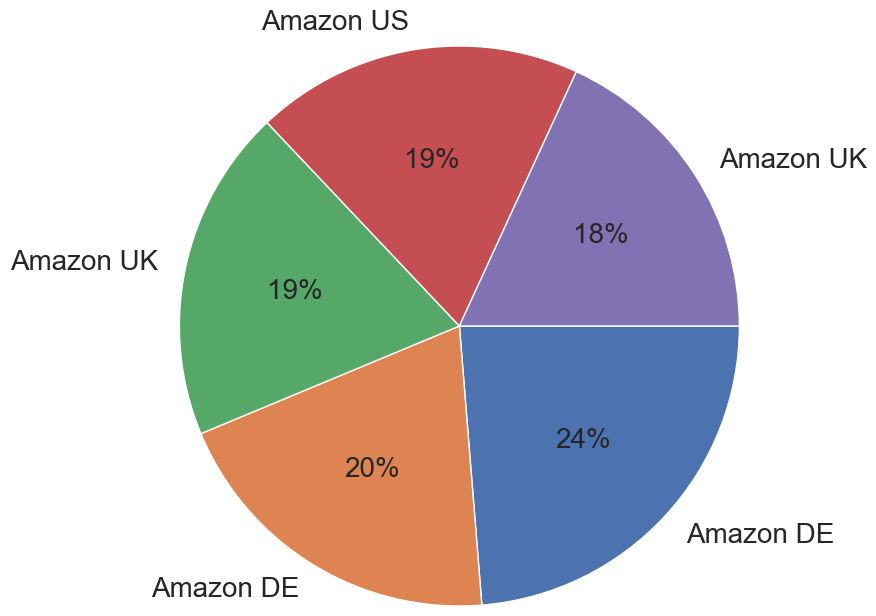

In [16]:
plt.figure(figsize=((20,10)))
plt.subplot(2,2,1)
plt.pie(Stores_Phone_count["phone_model"],labels=Stores_Phone_count["store"],autopct="%0.0f%%",
        counterclock=False,radius=2,textprops={"fontsize":20})
plt.rcParams['font.size']=20
plt.show()

In [17]:
Yearly_base_count=df.groupby(["phone_brand","launch_year"]).size().reset_index(name="count").sort_values("count",ascending=False).nlargest(10,"count")

In [18]:
Yearly_base_count

,phone_brand,launch_year,count
78,xiaomi,2022,109
79,xiaomi,2023,109
61,samsung,2022,99
62,samsung,2023,93
60,samsung,2021,90
77,xiaomi,2021,87
80,xiaomi,2024,74
63,samsung,2024,61
32,motorola,2022,56
59,samsung,2020,51


Bar plt with horizon way

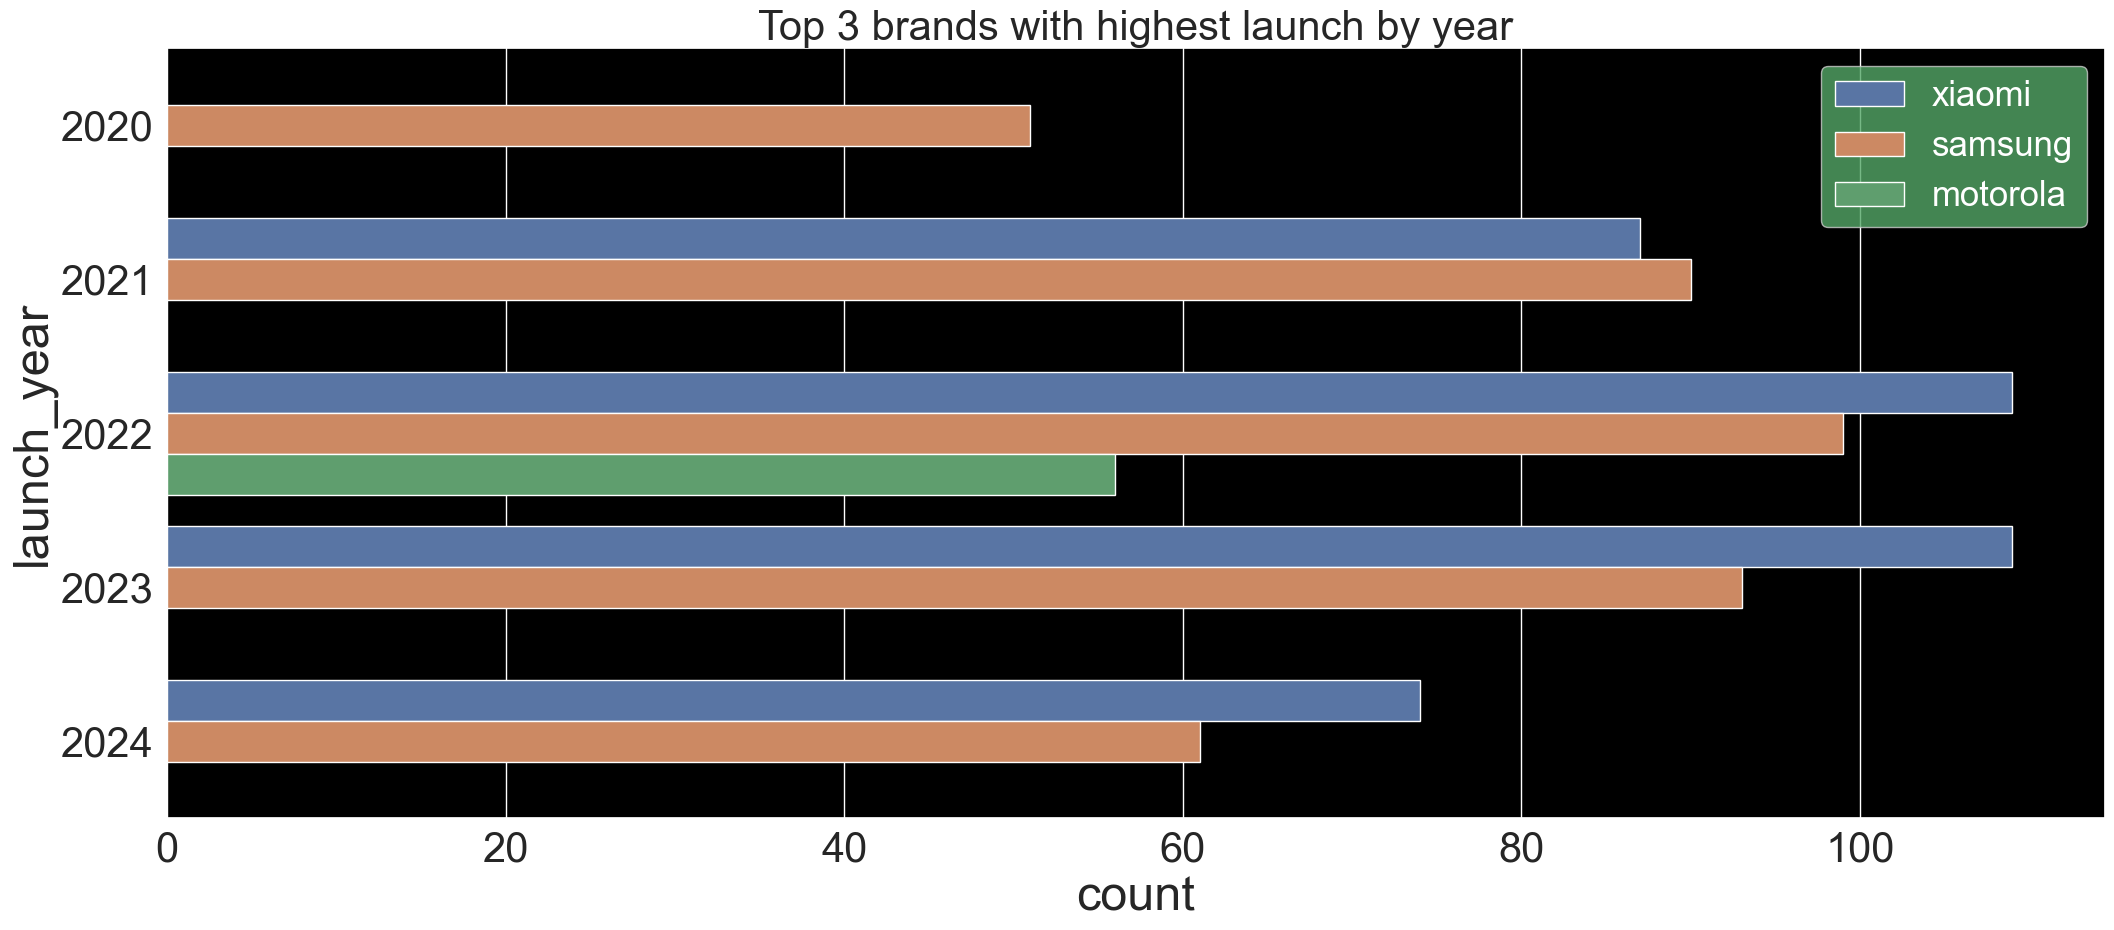

In [19]:
plt.figure(figsize=(25,10))
sns.set(style="darkgrid")
ax=sns.barplot(data=Yearly_base_count,y="launch_year",x="count",hue="phone_brand",orient="h")
ax.set_facecolor("black")
plt.legend(fontsize=25,facecolor="g",labelcolor="w")
plt.title("Top 3 brands with highest launch by year",fontsize=30)
plt.xlabel("count",size=35,)
plt.ylabel("launch_year",size=35)
plt.tick_params(axis="both",labelsize=30)
plt.show()

Lineplot

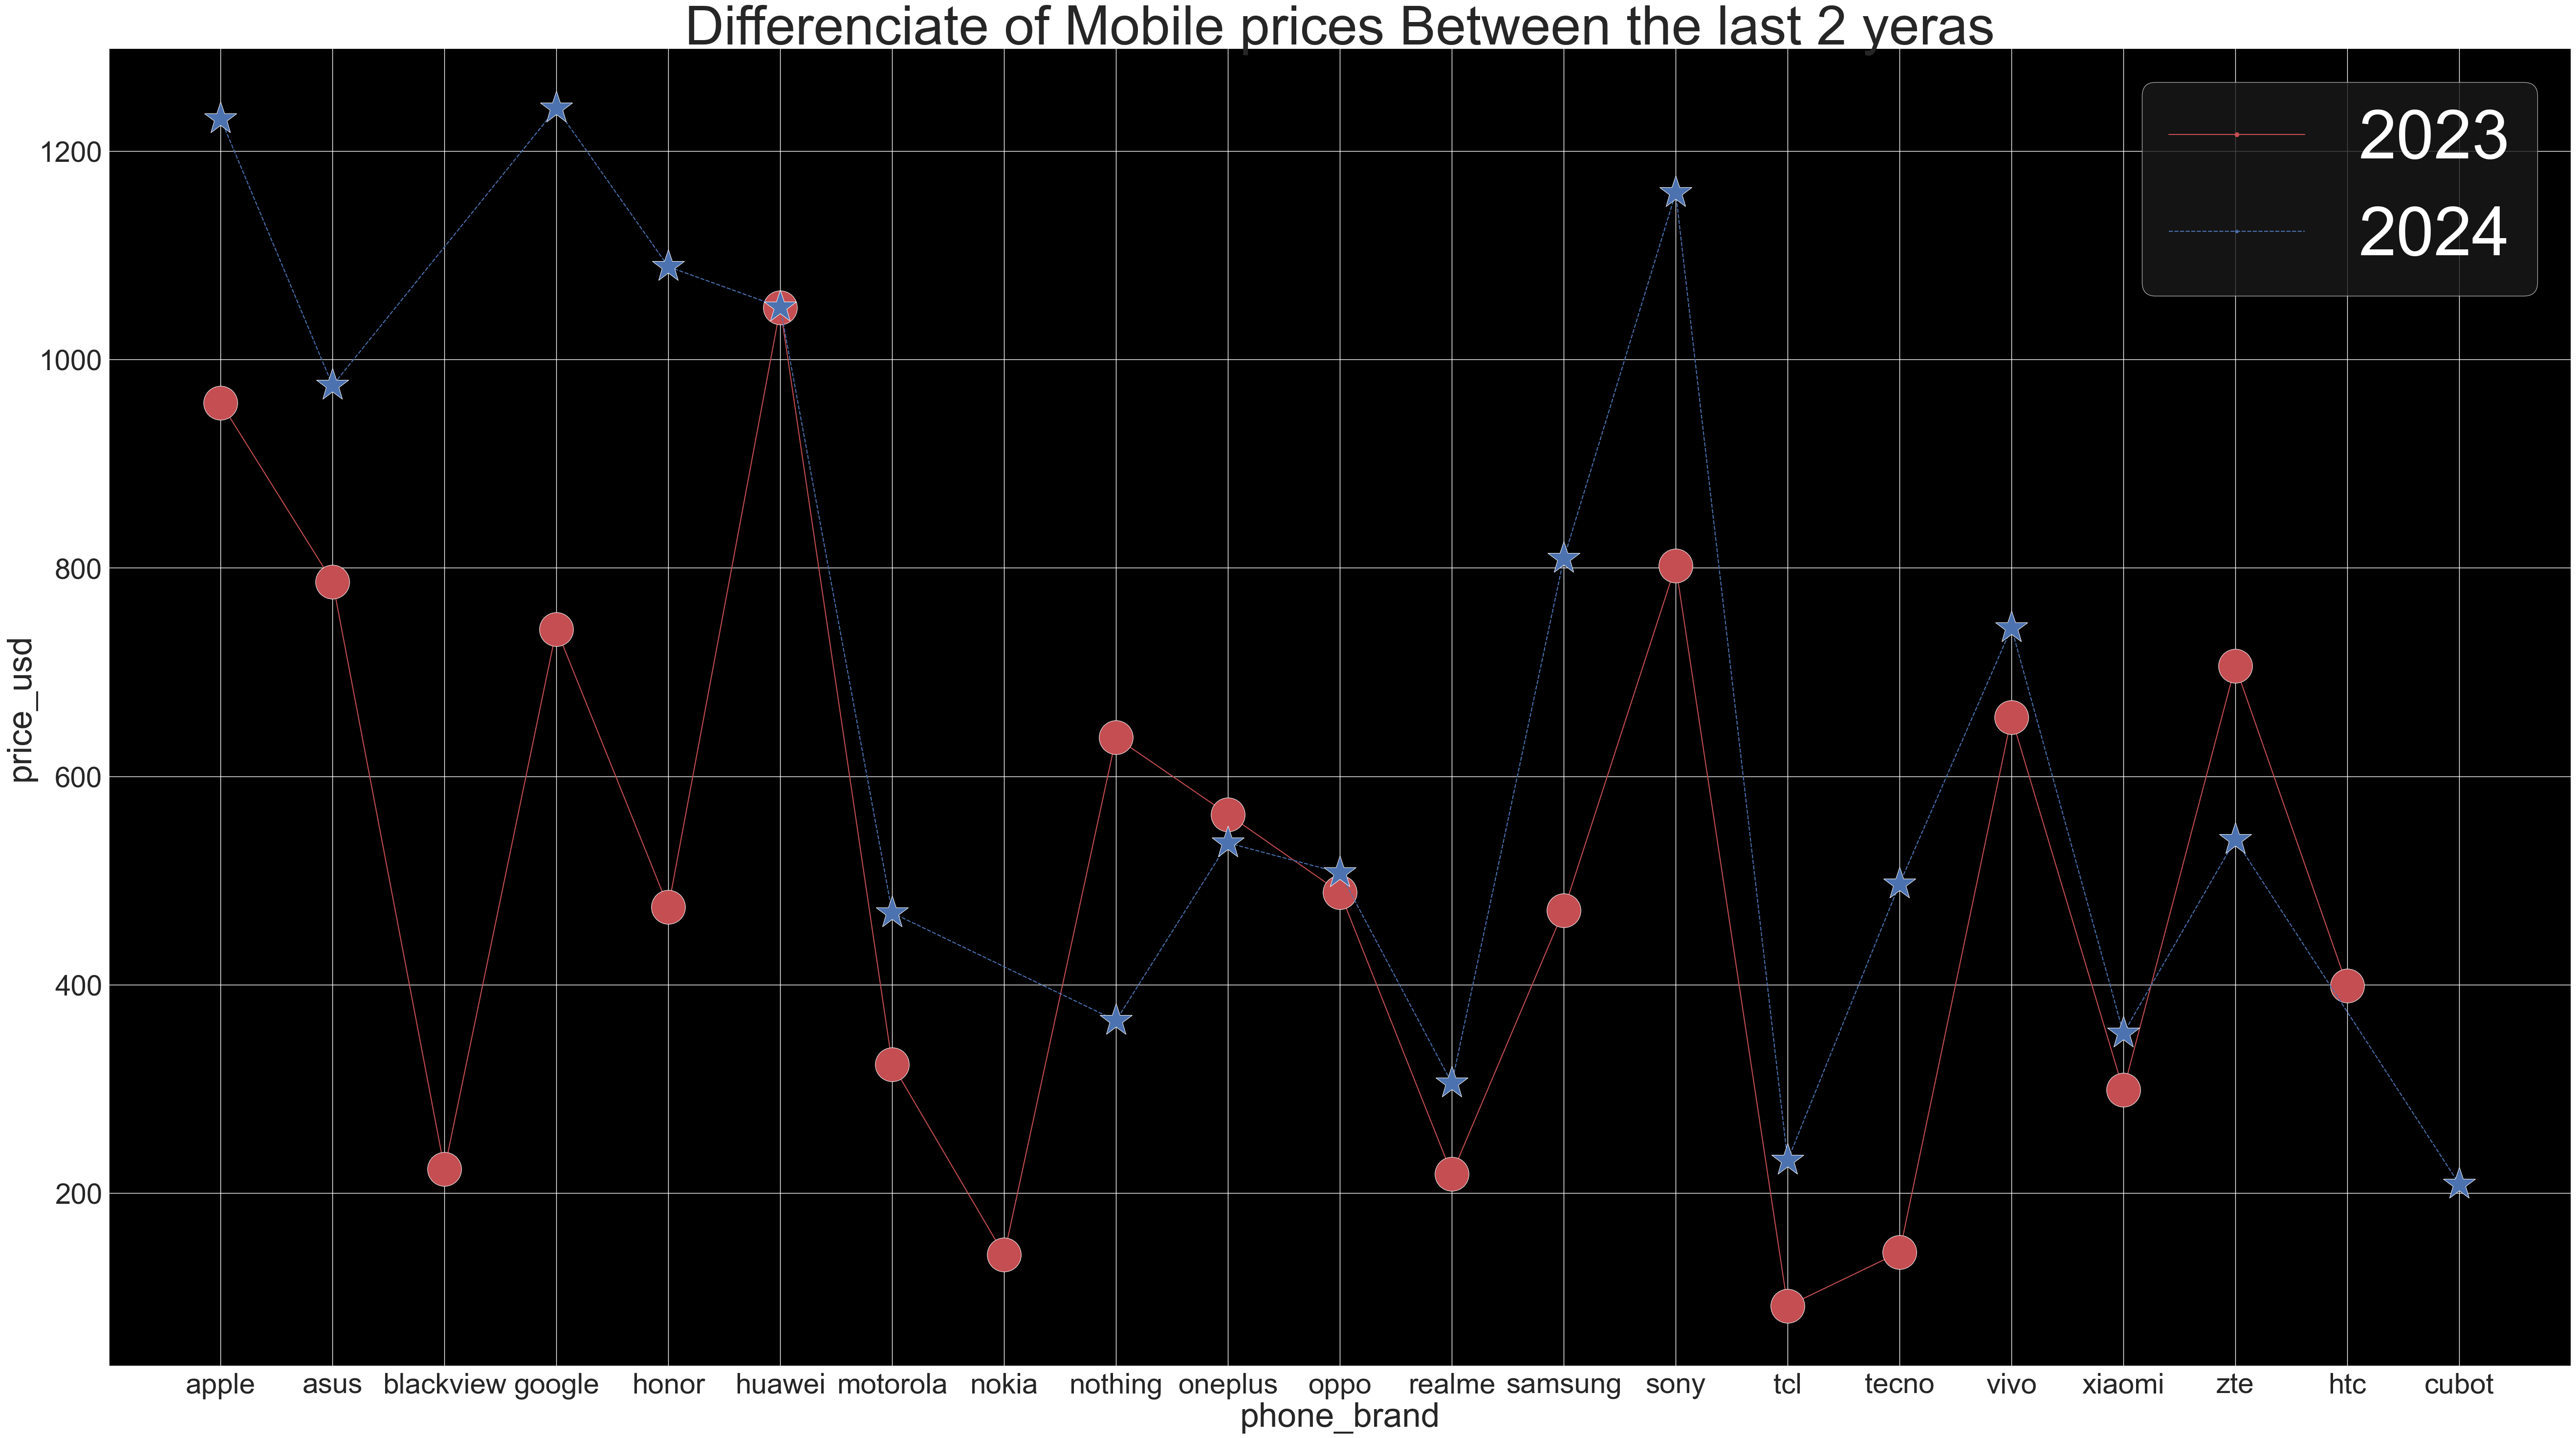

In [20]:
years=[2023,2024]
filtered_year=df[df["launch_year"].isin(years)]
plt.figure(figsize=(65,35))
sns.set(style="darkgrid")
ax=sns.lineplot(data=filtered_year, x="phone_brand",y="price_usd",hue="launch_year",markers=["o","*"],
            style="launch_year",markersize=50,palette=["r","b"],alpha=1,errorbar=None)
ax.set_facecolor("black")
plt.legend(fontsize=100,facecolor="k",labelcolor="w")
plt.xlabel("phone_brand",size=50,)
plt.ylabel("price_usd",size=50)
plt.tick_params(axis="both",labelsize=42)
plt.title("Differenciate of Mobile prices Between the last 2 yeras",size=80)
plt.show()

## Conclusion

1)apple and  asus prices got high  in the year of 2024. Huawei price is same in last 2 years .
The price got double in last 2 years for the samsung and sony brands.
Only 1 brand that price got decrease in current year is Zie.

2)Xiomi and samsung these two brands had hot launches in the year of 2022 and 2023 over of 100.

3)Amazon DE store  has 48% mobile phones of this two brands xiomi and samsung ,among top 5 stores of  top quantity phone model.

4) All type of  video_resolution are avalabile in those mobiles where ram size is 6 to 12. 
8k video_resolution is only avalable when the ram size 24.

5) Cubot KingKong ,Samsung Galaxy Tab S9 ,	Samsung Galaxy Tab S9 F, ZTE nubia Red Magic 9S Pro,	
ZTE nubia Red Magic 9 Pro these phone model has highest average battery power from 6500 to 10000

6)from this dataset we also got samsung , xiomi and apple has highest number of mobile quantity